# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening an Indonesia restaurant in Toronto, Canada.

Since there are lots of restaurants in Toronto we will try to detect locations that are not already crowded with restaurants. We are also particularly interested in areas with less Asian restaurant in vicinity. We would also prefer locations as close to city center as possible, assuming that first two conditions are met.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* number of existing restaurants in the neighborhood (any type of restaurant)
* number of and distance to Asian restaurants in the neighborhood, if any
* distance of neighborhood from city center

We decided to use regularly spaced grid of locations, centered around city center, to define our neighborhoods.

Following data sources will be needed to extract/generate the required information:
* Toronto areas will be generated algorithmically and approximate addresses will be obtained using **Wikipedia Postal Code of Canada**
* coordinate of Toronto center will be obtained using **Geocoder** or **Geospatial Data.csv**
* number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**

### - Import Libraries

In [1]:
!pip install folium
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle request

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# tranforming json file into a pandas dataframe library
import json
from pandas.io.json import json_normalize

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML

print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Libraries imported.


### - Load Data

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale)
M1CScarborough(Rouge Hill / Port Union / Highland Creek),M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Old Burnhamthorpe / Markland Wood)
M1EScarborough(Guildwood / Morningside / West Hill),M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned
M1HScarborough(Cedarbrae),M2HNorth York(Hillcrest Village),M3HNorth York(Bathurst Manor / Wilson Heights / Downsview North),M4HEast York(Thorncliffe Park),M5HDowntown Toronto(Richmond / Adelaide / King),M6HWest Toronto(Dufferin / Dovercourt Village),M7HNot assigned,M8HNot assigned,M9HNot assigned
M1JScarborough(Scarborough Village),M2JNorth York(Fairview / Henry Farm / Oriole),M3JNorth York(Northwood Park / York University),M4JEast YorkEast Toronto(The Danforth East),M5JDowntown Toronto(Harbourfront East / Union Station / Toronto Islands),M6JWest Toronto(Little Portugal / Trinity),M7JNot assigned,M8JNot assigned,M9JNot assigned
M1KScarborough(Kennedy Park / Ionview / East Birchmount Park),M2KNorth York(Bayview Village),M3KNorth York(Downsview)East (CFB Toronto),M4KEast Toronto(The Danforth West / Riverdale),M5KDowntown Toronto(Toronto Dominion Centre / Design Exchange),M6KWest Toronto(Brockton / Parkdale Village / Exhibition Place),M7KNot assigned,M8KNot assigned,M9KNot assigned
M1LScarborough(Golden Mile / Clairlea / Oakridge),M2LNorth York(York Mills / Silver Hills),M3LNorth York(Downsview)West,M4LEast Toronto(India Bazaar / The Beaches West),M5LDowntown Toronto(Commerce Court / Victoria Hotel),M6LNorth York(North Park / Maple Leaf Park / Upwood Park),M7LNot assigned,M8LNot assigned,M9LNorth York(Humber Summit)
M1MScarborough(Cliffside / Cliffcrest / Scarborough Village West),M2MNorth York(Willowdale / Newtonbrook),M3MNorth York(Downsview)Central,M4MEast Toronto(Studio District),M5MNorth York(Bedford Park / Lawrence Manor East),M6MYork(Del Ray / Mount Dennis / Keelsdale and Silverthorn),M7MNot assigned,M8MNot assigned,M9MNorth York(Humberlea / Emery)
M1NScarborough(Birch Cliff / Cliffside West),M2NNorth York(Willowdale)South,M3NNorth York(Downsview)Northwest,M4NCentral Toronto(Lawrence Park),M5NCentral Toronto(Roselawn),M6NYork(Runnymede / The Junction North),M7NNot assigned,M8NNot assigned,M9NYork(Weston)


### - Scrape Neighborhoods Data¶

In [3]:
# loop through table, grab each of the 3 columns shown
# Scrape the neighborhood data from the table in the wikipedia page of Toronto
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
      # Create three columns named as "PostalCode","Borough" & "Neighborhood"
        cell['PostalCode'] = row.p.text[:3] # store only first three letter from the test of <p> tab.(Ex: M3A )
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        # here we replace some symbols like "(" , ")" , "/" from the neighborhood name(Ex: (Parkview Hill / Woodbine Gardens))
        table_contents.append(cell)

df=pd.DataFrame(table_contents)
# compress some big borough name by smaller one
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


### - Data Cleansing & Processing

In [4]:
# drop rows having null value and value assigned as "Not assigned"
df_dropna = df.dropna()
empty = 'Not assigned'
df_dropna = df_dropna[(df_dropna.PostalCode != empty ) & (df_dropna.Borough != empty) & (df_dropna.Neighborhood != empty)].reset_index(drop=True)

# check for missing value
df_dropna.isnull().sum()

#Check if we still have any Neighborhoods that are Not Assigned
df_dropna.loc[df_dropna['Borough'].isin(["Not assigned"])]
df = df_dropna

# shape of dataframe
print('The shape of our dataframe is {} with the following details:\n- {} rows\n- {} columns\n- {} unique postal codes\n- {} unique boroughs\n- {} unique neighborhoods'.format(df.shape, df.shape[0], df.shape[1],
len(df.PostalCode.unique()), len(df.Borough.unique()), len(df.Neighborhood.unique())))
df.head()

The shape of our dataframe is (103, 3) with the following details:
- 103 rows
- 3 columns
- 103 unique postal codes
- 15 unique boroughs
- 103 unique neighborhoods


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


### - Importing the csv file conatining the latitudes and longitudes for various neighbourhoods in Canada

In [5]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.rename(columns={'Postal Code':'PostalCode'},inplace=True)
lat_lon.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### - Merging the two tables for getting the Latitudes and Longitudes for various neighbourhoods in Canada

In [6]:
df2 = pd.merge(df,lat_lon,on='PostalCode')
df2.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


### - Exploring and clustering the neighborhoods in Toronto

In [7]:
# Get geograpical coordinates of Toronto, Canada

address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Canada are 43.6534817, -79.3839347.


In [8]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df2['Latitude'], df2['Longitude'], df2['Borough'], df2['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### - Foursquare API

The final data set to be gathered is using Foursquare to provide data for the immediate vicinity for each of the neighborhood of interest in Toronto.

In this section we find up 100 venues in the 500m closest to the neigborhood listed in Toronto. The final output is a DataFrame containing these details which can then be used for clustering in the next step of data analysis (out of scope for this week's assignment.

The steps followed are the following:
- Using the latitude and longitude found in the previous section, query Foursquare using the explore API to find up to 100 local popular venues.
- Group the data produced by office name and shape using one hot encoding.
- Find the 10 most common venues for each neigborhood and create a final DataFrame with this data for analysis.
The final DataFrame can be found at the bottom of this section.

In [9]:
# The code was removed by Watson Studio for sharing.

Credentails saved in varibles CLIENT_ID, CLIENT_SECRET, VERSION


In [80]:
df3 = df2[df2['Borough'].str.contains('toronto', case = False)].reset_index(drop=True)
df3.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [159]:
# Creating Foursquare API url to analyze JSON  

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, 'restaurant', 500, 1)
    
# making a GET request to analyze JSON  
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60c831954e19bc395e1a38f4'},
 'response': {'venues': [{'id': '4ad4c05ff964a52048f720e3',
    'name': 'Hemispheres Restaurant & Bistro',
    'location': {'address': '110 Chestnut Street',
     'lat': 43.65488413420439,
     'lng': -79.38593077371578,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65488413420439,
       'lng': -79.38593077371578}],
     'distance': 224,
     'postalCode': 'M5G 1R3',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['110 Chestnut Street',
      'Toronto ON M5G 1R3',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d14e941735',
      'name': 'American Restaurant',
      'pluralName': 'American Restaurants',
      'shortName': 'American',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1623732629',
    'hasPerk': False}]}}

### - Fetch data for all parameters

In [160]:
def getNearbyVenues(names, latitudes, longitudes, radius = 500, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'neighborhood latitude', 
                  'neighborhood longitude', 
                  'venue', 
                  'venue latitude', 
                  'venue longitude', 
                  'venue category']
    
    return(nearby_venues)

In [161]:
    toronto_venues = getNearbyVenues(names=df3['Neighborhood'],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude']
                                  )

Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Enclave of M5E
St. James Town, Cabbagetown
First Canadi

In [169]:
print(toronto_venues.shape)
toronto_venues.head()
toronto_venues.groupby('Neighborhood').count()
print('There are {} unique categories within this data for Toronto.'.format(len(toronto_venues['venue category'].unique())))

(1494, 7)
There are 218 unique categories within this data for Toronto.


In [171]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['venue category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column

fixed_columns = [toronto_onehot.columns[215]] + list(toronto_onehot.columns[:215]) + list(toronto_onehot.columns[215:])                                                                    
toronto_onehot = toronto_onehot[fixed_columns]

print('Shape is:', toronto_onehot.shape)
toronto_onehot.head()

Shape is: (1494, 219)


,Wine Bar,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [172]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
print('Shape is:', toronto_grouped.shape)
toronto_grouped.head()

Shape is: (39, 219)


,Neighborhood,Wine Bar,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Berczy Park,0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.0,0.0,0.0,0.021739,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.021739,0.065217,0.000000,0.000000,0.0,0.021739,0.021739,0.0,0.043478,0.0,0.0,0.021739,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.021739,0.021739,0.0,0.0,0.0,0.021739,0.0,0.0,0.0,0.000000,0.0,0.086957,0.086957,0.0,0.0,0.0,0.0,0.021739,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.021739,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.043478,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021739,0.000000,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.021739,0.0,0.000000,0.021739,0.021739,0.021739,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000

Filtering Venue Category

In [173]:
# this list  is created manually
# selecting only features or categories which are restaurant/eateries
restaurant_features = ['Neighborhood','Greek Restaurant','Asian Restaurant','French Restaurant','Mexican Restaurant','Falafel Restaurant','Middle Eastern Restaurant','Modern European Restaurant','Japanese Restaurant','Ramen Restaurant','Thai Restaurant','Ethiopian Restaurant','Seafood Restaurant','Chinese Restaurant','Italian Restaurant','Vietnamese Restaurant','Restaurant','American Restaurant','Molecular Gastronomy Restaurant','New American Restaurant','German Restaurant','Comfort Food Restaurant','Moroccan Restaurant','Belgian Restaurant','Sushi Restaurant','Indian Restaurant','Portuguese Restaurant','Fast Food Restaurant','Korean Restaurant','Mediterranean Restaurant','Gluten-free Restaurant','Brazilian Restaurant','Colombian Restaurant','Latin American Restaurant','Cuban Restaurant','Malay Restaurant','Caribbean Restaurant','Eastern European Restaurant','Doner Restaurant','Taiwanese Restaurant','Theme Restaurant','Persian Restaurant','Afghan Restaurant']

In [174]:
toronto_grouped = toronto_grouped[restaurant_features]
print('Shape is:', toronto_grouped.shape)
toronto_grouped.head()

Shape is: (39, 43)


,Neighborhood,Greek Restaurant,Asian Restaurant,French Restaurant,Mexican Restaurant,Falafel Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Japanese Restaurant,Ramen Restaurant,Thai Restaurant,Ethiopian Restaurant,Seafood Restaurant,Chinese Restaurant,Italian Restaurant,Vietnamese Restaurant,Restaurant,American Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,German Restaurant,Comfort Food Restaurant,Moroccan Restaurant,Belgian Restaurant,Sushi Restaurant,Indian Restaurant,Portuguese Restaurant,Fast Food Restaurant,Korean Restaurant,Mediterranean Restaurant,Gluten-free Restaurant,Brazilian Restaurant,Colombian Restaurant,Latin American Restaurant,Cuban Restaurant,Malay Restaurant,Caribbean Restaurant,Eastern European Restaurant,Doner Restaurant,Taiwanese Restaurant,Theme Restaurant,Persian Restaurant,Afghan Restaurant
0,Berczy Park,0.021739,0.0,0.021739,0.0,0.000000,0.000000,0.000000,0.021739,0.0,0.021739,0.0,0.043478,0.0,0.021739,0.0,0.021739,0.0,0.0,0.0,0.0,0.021739,0.0,0.0,0.000000,0.021739,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.045455,0.0,0.000000,0.0,0.000000,0.0,0.045455,0.0,0.045455,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Central Bay Street,0.000000,0.0,0.016129,0.0,0.016129,0.016129,0.016129,0.048387,0.0,0.000000,0.0,0.000000,0.0,0.048387,0.0,0.032258,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.064516,0.016129,0.016129,0.016129,0.016129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Christie,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.066667,0.0,0.066667,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [176]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Seafood Restaurant,Comfort Food Restaurant,Indian Restaurant,French Restaurant,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Restaurant,Greek Restaurant,Latin American Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Restaurant,Italian Restaurant,Japanese Restaurant,Afghan Restaurant,Ethiopian Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Vietnamese Restaurant,Chinese Restaurant
2,"CN Tower, King and Spadina, Railway Lands, Har...",Afghan Restaurant,Ethiopian Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant,Seafood Restaurant
3,Central Bay Street,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Restaurant,Korean Restaurant,French Restaurant,Falafel Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Indian Restaurant
4,Christie,Restaurant,Italian Restaurant,Afghan Restaurant,Ethiopian Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Vietnamese Restaurant,Chinese Restaurant,Seafood Restaurant


We now have the datasets required in order to start analysis. In summary these are the following:

In [179]:
print('Data for all locations, with {} neighborhood in Toronto found.'.format(len(df3)))
df3.head()

Data for all locations, with 39 neighborhood in Toronto found.


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [178]:
print('Data for the 10 most common venues for each neighborhood, with {} venue categories seen in total.'.format(len(toronto_venues['venue category'].unique())))
neighborhoods_venues_sorted

Data for the 10 most common venues for each neighborhood, with 218 venue categories seen in total.


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Seafood Restaurant,Comfort Food Restaurant,Indian Restaurant,French Restaurant,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Restaurant,Greek Restaurant,Latin American Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Restaurant,Italian Restaurant,Japanese Restaurant,Afghan Restaurant,Ethiopian Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Vietnamese Restaurant,Chinese Restaurant
2,"CN Tower, King and Spadina, Railway Lands, Har...",Afghan Restaurant,Ethiopian Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant,Seafood Restaurant
3,Central Bay Street,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Restaurant,Korean Restaurant,French Restaurant,Falafel Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Indian Restaurant
4,Christie,Restaurant,Italian Restaurant,Afghan Restaurant,Ethiopian Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Vietnamese Restaurant,Chinese Restaurant,Seafood Restaurant
5,Church and Wellesley,Sushi Restaurant,Japanese Restaurant,Restaurant,Indian Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Afghan Restaurant,Persian Restaurant,Ramen Restaurant,Ethiopian Restaurant
6,"Commerce Court, Victoria Hotel",Restaurant,Japanese Restaurant,Asian Restaurant,American Restaurant,Sushi Restaurant,Italian Restaurant,Greek Restaurant,Gluten-free Restaurant,Molecular Gastronomy Restaurant,Seafood Restaurant
7,Davisville,Sushi Restaurant,Greek Restaurant,Seafood Restaurant,Indian Restaurant,Italian Restaurant,Thai Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Restaurant,Vietnamese Restaurant
8,Davisville North,Afghan Restaurant,Ethiopian Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant,Seafood Restaurant
9,"Dufferin, Dovercourt Village",Middle Eastern Restaurant,Afghan Restaurant,Ethiopian Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant


## Methodology <a name="methodology"></a>

For this project we will use the following methodology:

- Data has been collected from the wikipedia website for Toronto Postal Code and exact locations added
- The areas around each office will be characterised using data from Foursquare for venue types in a 500m radius around each.
- The data will be explored using heatmapping and K-means clustering in order to find similarities between the localities of the neighborhood in Toronto.

### - Find the K Number
Investigating the number of clusters to use

In [180]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(toronto_grouped.drop('Neighborhood', 1))
    Sum_of_squared_distances.append(km.inertia_)

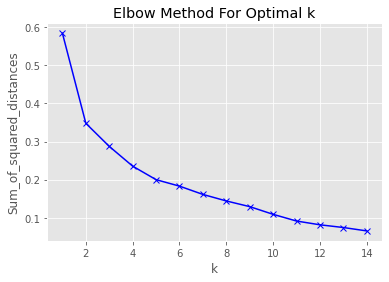

In [181]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on this, with a slight elbow seen at 5, we will use k = 5.

### - Clustering Implementation

In [183]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 4, 4, 2, 0, 2, 4, 2, 4, 4], dtype=int32)

In [184]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df3

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4,Restaurant,Greek Restaurant,Asian Restaurant,French Restaurant,Mexican Restaurant,Seafood Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Vietnamese Restaurant
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,4,Japanese Restaurant,Thai Restaurant,Middle Eastern Restaurant,Ramen Restaurant,Italian Restaurant,Vietnamese Restaurant,Falafel Restaurant,Modern European Restaurant,Ethiopian Restaurant,Seafood Restaurant
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,4,Italian Restaurant,Restaurant,Moroccan Restaurant,American Restaurant,Seafood Restaurant,Comfort Food Restaurant,Thai Restaurant,Belgian Restaurant,Molecular Gastronomy Restaurant,German Restaurant
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Afghan Restaurant,Ethiopian Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant,Seafood Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,4,Seafood Restaurant,Comfort Food Restaurant,Indian Restaurant,French Restaurant,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Restaurant,Greek Restaurant,Latin American Restaurant


## Analysis <a name="analysis"></a>

We will analyze each neighborhood of each cluster and the final product of this stage would be a Data Frame which top 10 most common restaurant type in each neighborhood which would be repeated for each of 5 Cluster.

In [187]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

From the above cluster map we can infer that clusters have a pattern. Neighborhoods closer to the city center are clustered togather and neighborhood in the outskirts have similar features.

In [188]:
toronto_merged.groupby(['Cluster Labels']).count()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,,,
0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24


We note that we see 3 main groups, with a couple of outliers with single member lists. The larger groups are the 4th, 1st and 2nd groups in size order.

### - Cluster 0
Extracting Top 10 Restaurant/Eatry from Neighborhood in Cluster 0

In [201]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Christie,0,Restaurant,Italian Restaurant,Afghan Restaurant,Ethiopian Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Vietnamese Restaurant,Chinese Restaurant,Seafood Restaurant
15,"India Bazaar, The Beaches West",0,Fast Food Restaurant,Restaurant,Italian Restaurant,Afghan Restaurant,Ethiopian Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Vietnamese Restaurant,Chinese Restaurant,Seafood Restaurant
22,"High Park, The Junction South",0,Mexican Restaurant,Thai Restaurant,Restaurant,Fast Food Restaurant,Italian Restaurant,Ethiopian Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Vietnamese Restaurant,Chinese Restaurant
25,"Parkdale, Roncesvalles",0,Restaurant,Eastern European Restaurant,Cuban Restaurant,Afghan Restaurant,Thai Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant
29,"Moore Park, Summerhill East",0,Restaurant,Afghan Restaurant,Ethiopian Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant,Seafood Restaurant
35,"St. James Town, Cabbagetown",0,Restaurant,Italian Restaurant,Taiwanese Restaurant,Caribbean Restaurant,Indian Restaurant,Chinese Restaurant,Japanese Restaurant,Afghan Restaurant,Ethiopian Restaurant,American Restaurant
38,Enclave of M4L,0,Restaurant,Fast Food Restaurant,Afghan Restaurant,Ethiopian Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant,Seafood Restaurant


### - Cluster 1 
Extracting Top 10 Restaurant/Eatry from Neighborhood in Cluster 1

In [202]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Roselawn,1,Fast Food Restaurant,Afghan Restaurant,Ethiopian Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant,Seafood Restaurant


## - Cluster 2
Extracting Top 10 Restaurant/Eatry from Neighborhood in Cluster 2

In [203]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Central Bay Street,2,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Restaurant,Korean Restaurant,French Restaurant,Falafel Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Indian Restaurant
21,Forest Hill North & West,2,Sushi Restaurant,Afghan Restaurant,Ethiopian Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant,Seafood Restaurant
26,Davisville,2,Sushi Restaurant,Greek Restaurant,Seafood Restaurant,Indian Restaurant,Italian Restaurant,Thai Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Restaurant,Vietnamese Restaurant
28,"Runnymede, Swansea",2,Sushi Restaurant,Italian Restaurant,French Restaurant,Falafel Restaurant,Latin American Restaurant,Afghan Restaurant,Seafood Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Restaurant
31,"Summerhill West, Rathnelly, South Hill, Forest...",2,Sushi Restaurant,American Restaurant,Vietnamese Restaurant,Afghan Restaurant,Ethiopian Restaurant,Molecular Gastronomy Restaurant,Restaurant,Italian Restaurant,Chinese Restaurant,Seafood Restaurant
37,Church and Wellesley,2,Sushi Restaurant,Japanese Restaurant,Restaurant,Indian Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Afghan Restaurant,Persian Restaurant,Ramen Restaurant,Ethiopian Restaurant


### - Cluster 3
Extracting Top 10 Restaurant/Eatry from Neighborhood in Cluster 3

In [204]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,"The Danforth West, Riverdale",3,Greek Restaurant,Italian Restaurant,American Restaurant,Restaurant,Sushi Restaurant,Indian Restaurant,Caribbean Restaurant,Japanese Restaurant,Ethiopian Restaurant,Vietnamese Restaurant


### - Cluster 4
Extracting Top 10 Restaurant/Eatry from Neighborhood in Cluster 4

In [205]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Regent Park, Harbourfront",4,Restaurant,Greek Restaurant,Asian Restaurant,French Restaurant,Mexican Restaurant,Seafood Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Vietnamese Restaurant
1,"Garden District, Ryerson",4,Japanese Restaurant,Thai Restaurant,Middle Eastern Restaurant,Ramen Restaurant,Italian Restaurant,Vietnamese Restaurant,Falafel Restaurant,Modern European Restaurant,Ethiopian Restaurant,Seafood Restaurant
2,St. James Town,4,Italian Restaurant,Restaurant,Moroccan Restaurant,American Restaurant,Seafood Restaurant,Comfort Food Restaurant,Thai Restaurant,Belgian Restaurant,Molecular Gastronomy Restaurant,German Restaurant
3,The Beaches,4,Afghan Restaurant,Ethiopian Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant,Seafood Restaurant
4,Berczy Park,4,Seafood Restaurant,Comfort Food Restaurant,Indian Restaurant,French Restaurant,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Restaurant,Greek Restaurant,Latin American Restaurant
7,"Richmond, Adelaide, King",4,Restaurant,Sushi Restaurant,Asian Restaurant,Japanese Restaurant,American Restaurant,New American Restaurant,Chinese Restaurant,Seafood Restaurant,Thai Restaurant,Fast Food Restaurant
8,"Dufferin, Dovercourt Village",4,Middle Eastern Restaurant,Afghan Restaurant,Ethiopian Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant
9,The Danforth East,4,Afghan Restaurant,Ethiopian Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant,Seafood Restaurant
10,"Harbourfront East, Union Station, Toronto Islands",4,Restaurant,Italian Restaurant,Seafood Restaurant,Thai Restaurant,Persian Restaurant,Sushi Restaurant,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Mediterranean Restaurant
11,"Little Portugal, Trinity",4,Asian Restaurant,Vietnamese Restaurant,New American Restaurant,Greek Restaurant,Korean Restaurant,French Restaurant,Restaurant,Malay Restaurant,Cuban Restaurant,Italian Restaurant


### - Fetching population data

In [209]:
df_population = pd.read_csv('https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/hlt-fst/pd-pl/Tables/CompFile.cfm?Lang=Eng&T=1201&OFT=FULLCSV')
df_population.head(5)

,Geographic code,Geographic name,Province or territory,"Incompletely enumerated Indian reserves and Indian settlements, 2016","Population, 2016","Total private dwellings, 2016","Private dwellings occupied by usual residents, 2016"
0,01,Canada,NaN,T,35151728.0,15412443.0,14072079.0
1,A0A,A0A,Newfoundland and Labrador,NaN,46587.0,26155.0,19426.0
2,A0B,A0B,Newfoundland and Labrador,NaN,19792.0,13658.0,8792.0
3,A0C,A0C,Newfoundland and Labrador,NaN,12587.0,8010.0,5606.0
4,A0E,A0E,Newfoundland and Labrador,NaN,22294.0,12293.0,9603.0


In [210]:
# Transform the dataframe

df_population = df_population[['Geographic code', 'Population, 2016', 'Total private dwellings, 2016']]
df_population.columns = ['Geographic code', 'Population 2016', 'Total Dwellings']
df_population.head()

,Geographic code,Population 2016,Total Dwellings
0,01,35151728.0,15412443.0
1,A0A,46587.0,26155.0
2,A0B,19792.0,13658.0
3,A0C,12587.0,8010.0
4,A0E,22294.0,12293.0


In [211]:
# Merging dataframes

toronto_pop = pd.merge(toronto_merged, df_population, left_on='PostalCode', right_on='Geographic code', copy=True, indicator=False)
toronto_pop = toronto_pop.drop(['Geographic code'], axis=1)

print ('Dataframe size: ', toronto_pop.shape)
toronto_pop.head()

Dataframe size:  (39, 18)


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population 2016,Total Dwellings
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4,Restaurant,Greek Restaurant,Asian Restaurant,French Restaurant,Mexican Restaurant,Seafood Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Vietnamese Restaurant,41078.0,24186.0
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,4,Japanese Restaurant,Thai Restaurant,Middle Eastern Restaurant,Ramen Restaurant,Italian Restaurant,Vietnamese Restaurant,Falafel Restaurant,Modern European Restaurant,Ethiopian Restaurant,Seafood Restaurant,12785.0,8249.0
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,4,Italian Restaurant,Restaurant,Moroccan Restaurant,American Restaurant,Seafood Restaurant,Comfort Food Restaurant,Thai Restaurant,Belgian Restaurant,Molecular Gastronomy Restaurant,German Restaurant,2951.0,1879.0
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Afghan Restaurant,Ethiopian Restaurant,New American Restaurant,Molecular Gastronomy Restaurant,American Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant,Seafood Restaurant,25044.0,11284.0
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,4,Seafood Restaurant,Comfort Food Restaurant,Indian Restaurant,French Restaurant,Japanese Restaurant,Thai Restaurant,Italian Restaurant,Restaurant,Greek Restaurant,Latin American Restaurant,9118.0,6232.0


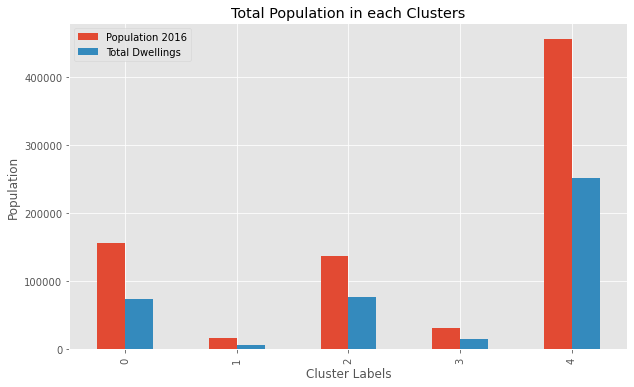

In [213]:
# grouped by sum
df_toronto_grouped_sum = toronto_pop.drop(['PostalCode', 'Latitude', 'Longitude',], axis=1).groupby('Cluster Labels').sum().reset_index() 

# Generate bar plot with total population in each cluster
df_toronto_grouped_sum.filter(['Population 2016','Total Dwellings'], axis=1).plot(kind='bar', figsize=(10, 6))

plt.xlabel('Cluster Labels') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Total Population in each Clusters') # add title to the plot

plt.show()

From the above bar graph we can infer that cluster 4 has the highest population and dwelling followed by Cluster 0 , CLuster 2. Cluster 3 and Cluster 1 has less population than the other.

## Results and Discussion <a name="results"></a>

We analyse all the eateries and restaurants in every neighborhood of a city and then creates a list of top 10 spots (Restaurant/Eatry type) in every neighborhood displayed in percentages of the total restaurants in that praticular neighborhood. A prospective business owner can use this insight to see which cuisine based restaurants are lacking or what type of Restaurants are doing well(due to theirr high number) in which neighnorhoods. He can then make an informed decision and fill the void and have a better chance of establishing a successful business.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify Toronto areas close to center with low number of restaurants (particularly Asian restaurants) in order to aid stakeholders in narrowing down the search for optimal location for a new Indonesian restaurant. By calculating restaurant density distribution from Foursquare data we have first identified general boroughs that justify further analysis and then generated extensive collection of locations which satisfy some basic requirements regarding existing nearby restaurants. Clustering of those locations was then performed in order to create major zones of interest (containing most common restaurant in order) and addresses of those zone were created to be used as starting points for final exploration by stakeholders.

Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.